In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

In [10]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')
X_train = np.concatenate((X_1, X_2, X_3))
y_train = np.zeros((X_train.shape[0]))
y_train[0:X_1.shape[0]] = 0
y_train[X_1.shape[0]:X_1.shape[0]+X_2.shape[0]] = 1
y_train[X_1.shape[0]+X_2.shape[0]:] = 2

Text(0, 0.5, 'X2')

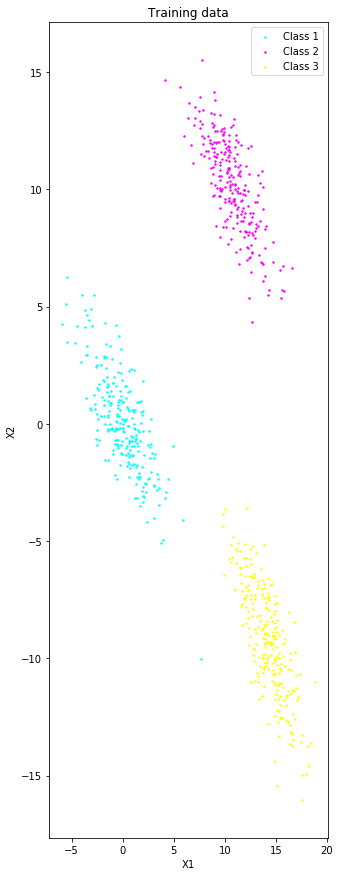

In [11]:
# simply visualising data
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))
plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')

In [12]:
# svm classifier
clf = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((3, 3))
X = [X_1_test, X_2_test, X_3_test]
for i in range(3):
    for x in X[i]:
        x = x.reshape(1, -1)
        ConfusionMatrix[int(clf.predict(x)), i] = ConfusionMatrix[int(clf.predict(x)), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3'],['True 1', 'True 2', 'True 3'])

,True 1,True 2,True 3
Predicted 1,100.0,0.0,0.0
Predicted 2,0.0,100.0,0.0
Predicted 3,0.0,0.0,100.0


In [14]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [100.0, 100.0, 100.0], 'Mean Accuracy': 100.0}
{'Precision: ': [1.0, 1.0, 1.0], 'Mean Precision': 1.0}
{'Recall: ': [1.0, 1.0, 1.0], 'Mean Recall': 1.0}
{'F_measure: ': [1.0, 1.0, 1.0], 'Mean F_measure': 1.0}


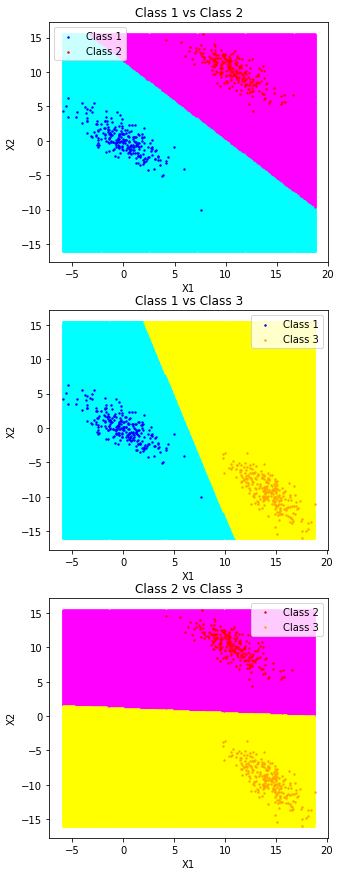

In [17]:
# decision region plot for every pair of classes with the respective training data superimposed
Nclasses = 3
Nfigures = (Nclasses)*(Nclasses-1)//2
plt.rcParams['figure.figsize'] = [5, 5*Nfigures]
fig, axs = plt.subplots(Nfigures, 1)

x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1])])

bg = ['cyan', 'magenta', 'yellow']
fc = ['blue', 'red', 'orange']
X = [X_1, X_2, X_3]

i = 0
for c1 in range(1, Nclasses+1):
    for c2 in range(c1+1, Nclasses+1):
        x_1 = []
        x_2 = []
        for x in np.arange(x_min, x_max, 0.1):
            for y in np.arange(y_min, y_max, 0.1):
                c = clf.decision_function([[x, y]])[0][i] < 0
                if c == 0:
                    x_1.append([x, y])
                elif c == 1:
                    x_2.append([x, y])
        x_1 = np.array(x_1)
        x_2 = np.array(x_2)
        axs[i].scatter(x_1[:, 0], x_1[:, 1], color = bg[c1-1], s = 2)
        axs[i].scatter(x_2[:, 0], x_2[:, 1], color = bg[c2-1], s = 2)
        C1plt = axs[i].scatter(X[c1-1][:, 0], X[c1-1][:, 1], color = fc[c1-1], s = 2)
        C2plt = axs[i].scatter(X[c2-1][:, 0], X[c2-1][:, 1], color = fc[c2-1], s = 2)
        axs[i].set_title('Class '+str(c1)+' vs Class '+str(c2))
        axs[i].set_xlabel('X1')
        axs[i].set_ylabel('X2')
        axs[i].legend((C1plt, C2plt), ('Class '+str(c1), 'Class '+str(c2)))
        i = i+1

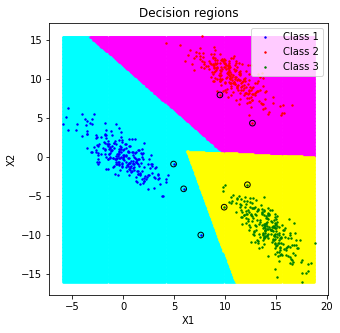

In [20]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.predict([[x, y]])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        else:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
plt.title('Decision regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='black', s = 32)